In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


*** Assuming df is your DataFrame***

In [3]:
df = pd.read_csv('/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')

**Selected columns for analysis**

In [4]:
selected_columns = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary',
                    'active_member', 'credit_card', 'churn', 'customer_id']

**Descriptive statistics**

In [5]:
print("Descriptive Statistics:")
print(df[selected_columns].describe())

Descriptive Statistics:
       credit_score           age        tenure        balance  \
count  10000.000000  10000.000000  10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288   
std       96.653299     10.487806      2.892174   62397.405202   
min      350.000000     18.000000      0.000000       0.000000   
25%      584.000000     32.000000      3.000000       0.000000   
50%      652.000000     37.000000      5.000000   97198.540000   
75%      718.000000     44.000000      7.000000  127644.240000   
max      850.000000     92.000000     10.000000  250898.090000   

       products_number  estimated_salary  active_member  credit_card  \
count     10000.000000      10000.000000   10000.000000  10000.00000   
mean          1.530200     100090.239881       0.515100      0.70550   
std           0.581654      57510.492818       0.499797      0.45584   
min           1.000000         11.580000       0.000000      0.00000   
25%           1.00000

**Loop for plotting each variable**

In [6]:
for column in selected_columns:
    plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

**in histogram**

**X-axis: Represents the ranges**

**Y-axis: Represents the frequency (count) of each one**

**Bars: Vertical bars show the distribution**

Text(0, 0.5, 'Frequency')

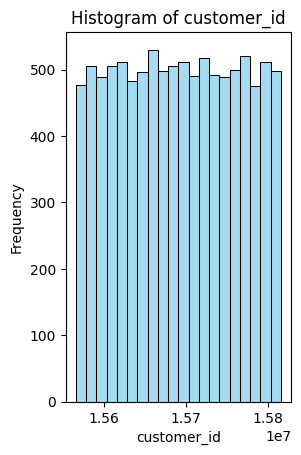

In [7]:
plt.subplot(1, 2, 1)
sns.histplot(df[column], bins=20, kde=False, color='skyblue')
plt.title(f'Histogram of {column}') 
plt.xlabel(column)
plt.ylabel('Frequency')

# box plot

**#The box represents the interquartile range (IQR)**

**#The line inside the box represents the median**

**#Whiskers indicate the ranges, and potential outliers might be shown as individual points**

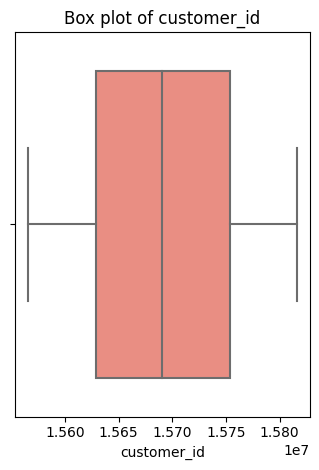

In [8]:
plt.subplot(1, 2, 2)
sns.boxplot(x=df[column], color='salmon')
plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

**#In the KDE plot:**

**#X-axis: Represents the ranges**

**#Y-axis: Represents the estimated probability density**

**#The smooth curve shows the continuous probability distribution**


 # Kernel Density Estimation plot

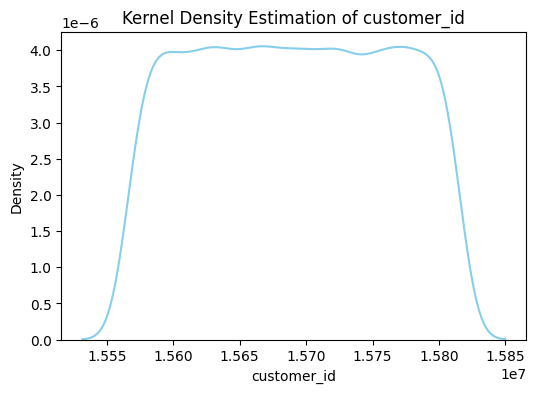

In [9]:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[column], color='skyblue')
    plt.title(f'Kernel Density Estimation of {column}')
    plt.show()


# Bivariate analysis

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [11]:
df = pd.read_csv('/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')

**# Bivariate Analysis - Scatter Plots and Correlation Analysis (Numeric Variables)**

In [12]:
numeric_variables = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

**Generates scatter plots for pairs of numeric variables and displays the correlation matrix heatmap**.

**Scatter plots**

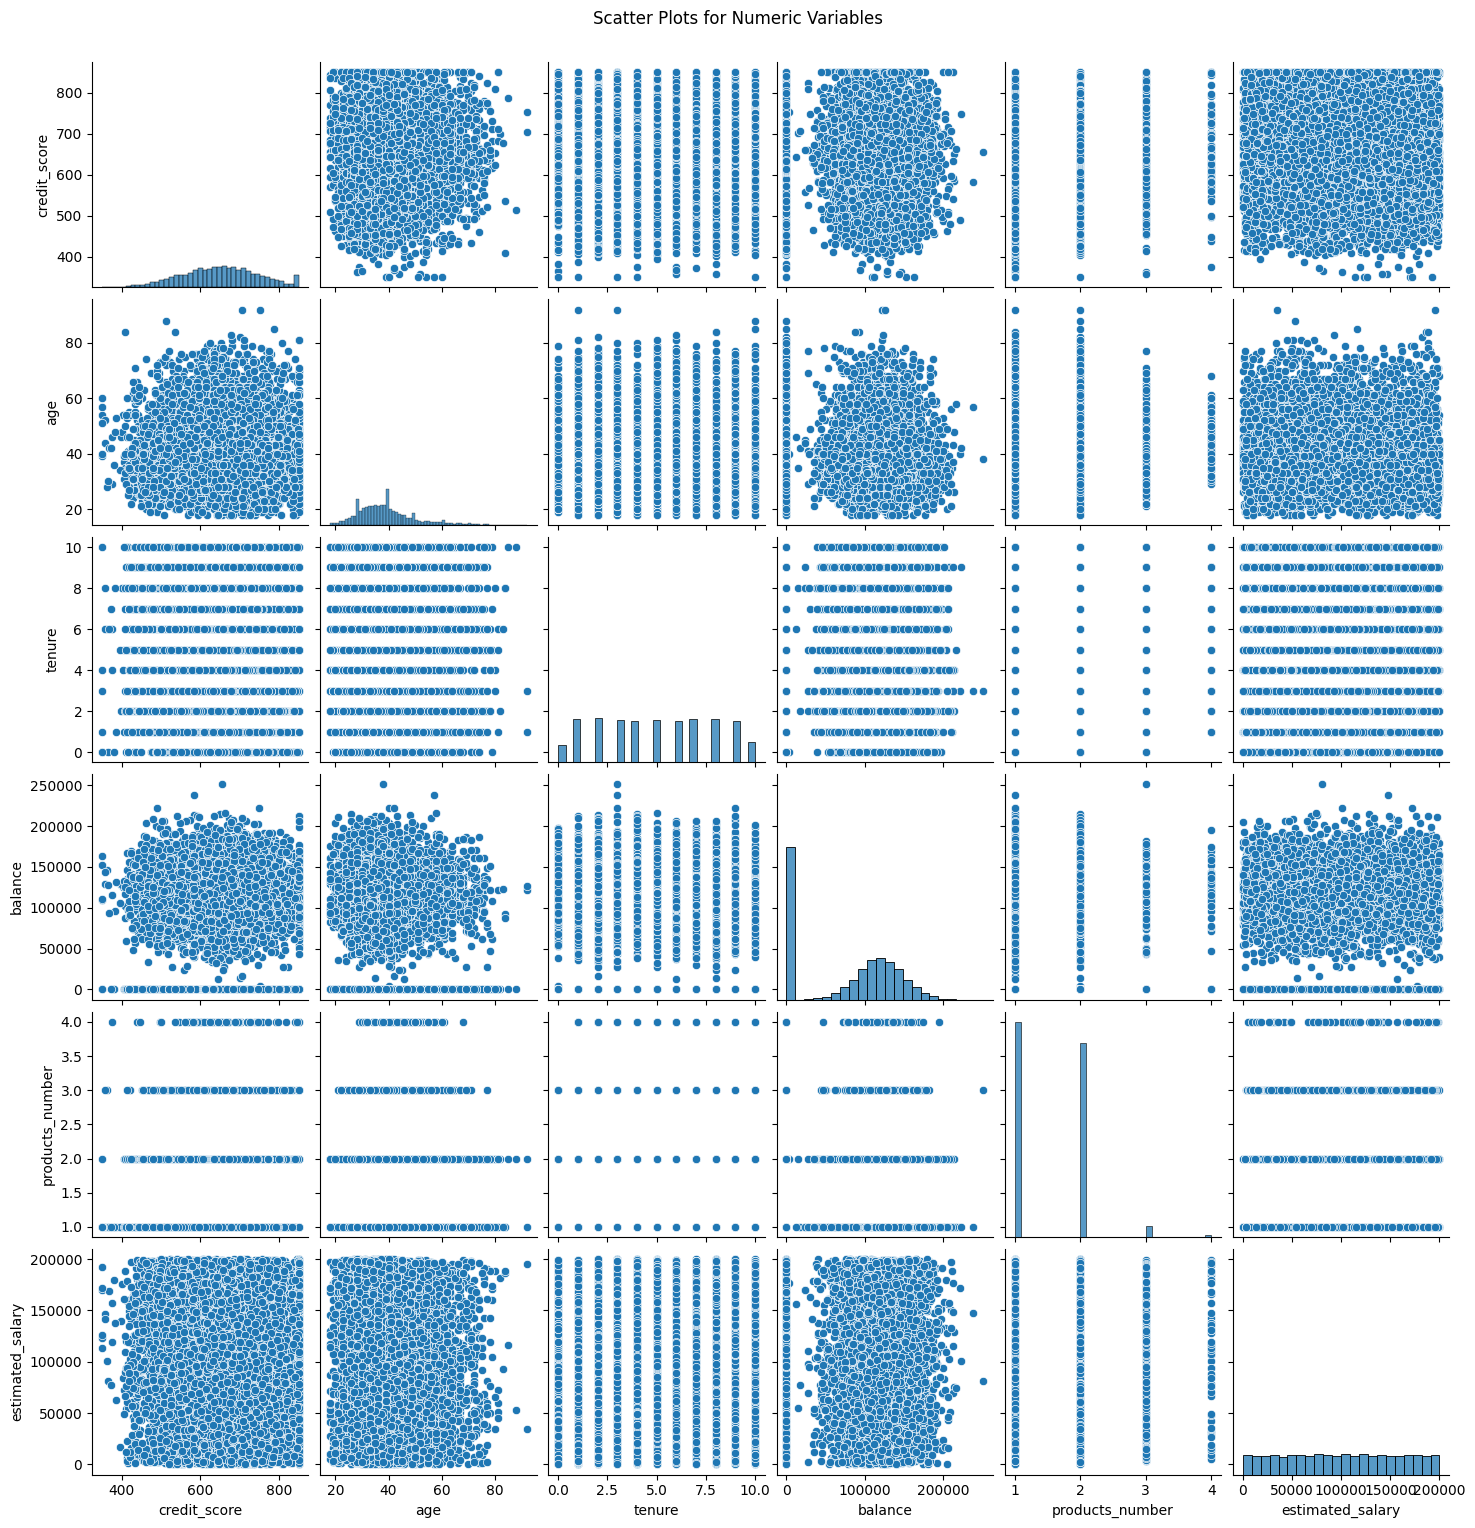

In [13]:
sns.pairplot(df[numeric_variables])
plt.suptitle('Scatter Plots for Numeric Variables', y=1.02)
plt.show()

**Correlation matrix**

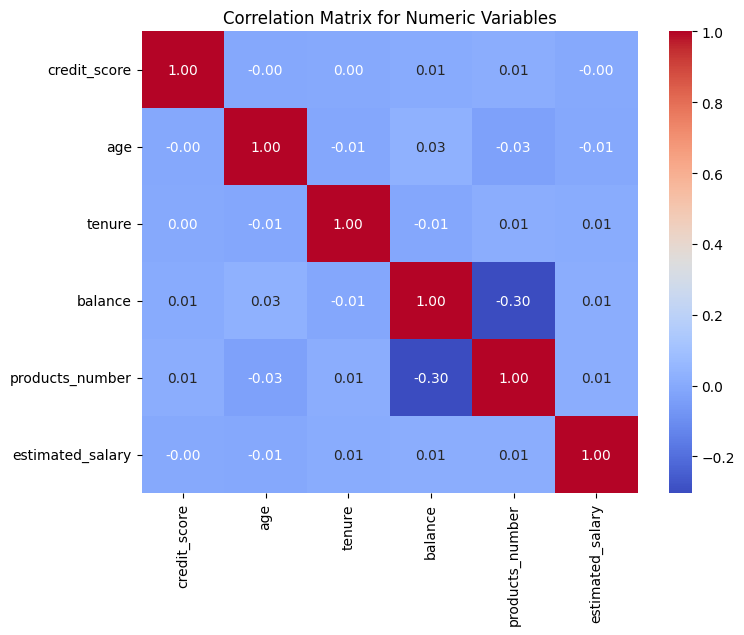

In [14]:
correlation_matrix = df[numeric_variables].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Variables')
plt.show()


**# Bivariate Analysis - Contingency Table and Chi-Square Test (Categorical Variables)**

In [15]:
categorical_variables = ['active_member', 'gender', 'credit_card', 'churn']


**Performs chi-square tests for pairs of a categorical variable and a numeric variable, visualizes the contingency tables, and prints test statistics.**


**# Contingency tables and chi-square tests**


Chi-square test for active_member vs. Churn:
Chi-square statistic: 242.98534164287963
P-value: 8.785858269303703e-55


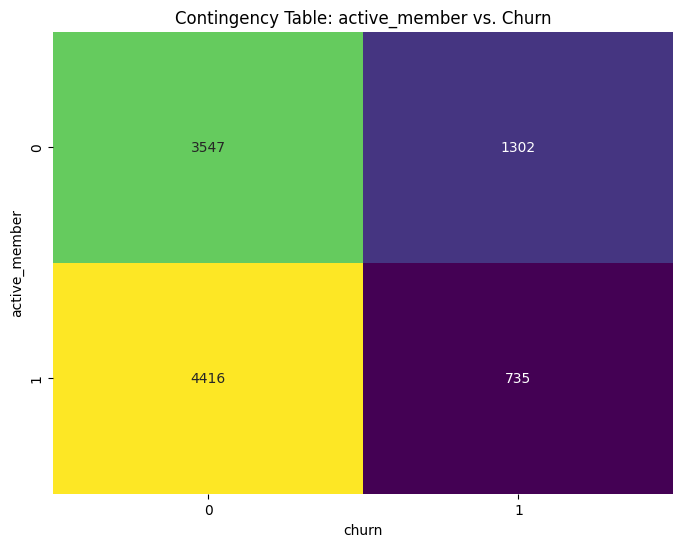


Chi-square test for gender vs. Churn:
Chi-square statistic: 112.91857062096116
P-value: 2.2482100097131755e-26


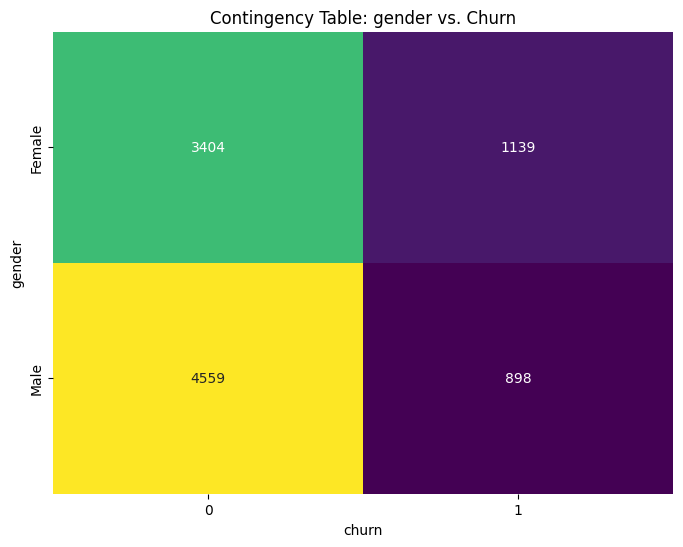


Chi-square test for credit_card vs. Churn:
Chi-square statistic: 0.47133779904440803
P-value: 0.49237236141554686


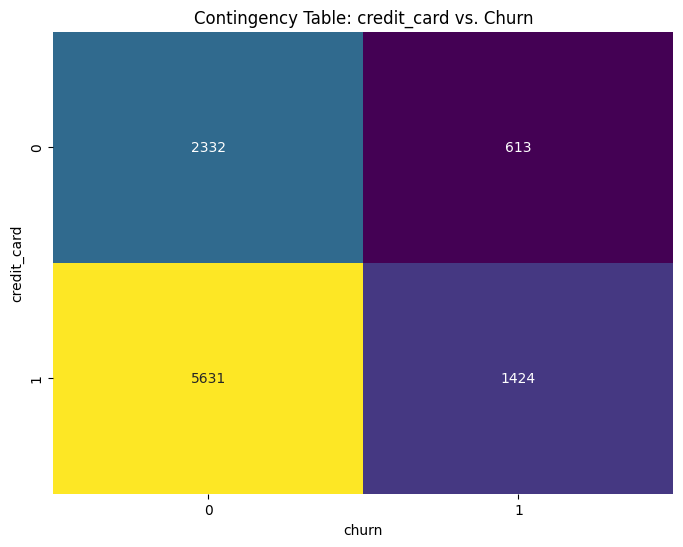


Chi-square test for churn vs. Churn:
Chi-square statistic: 9993.835961897581
P-value: 0.0


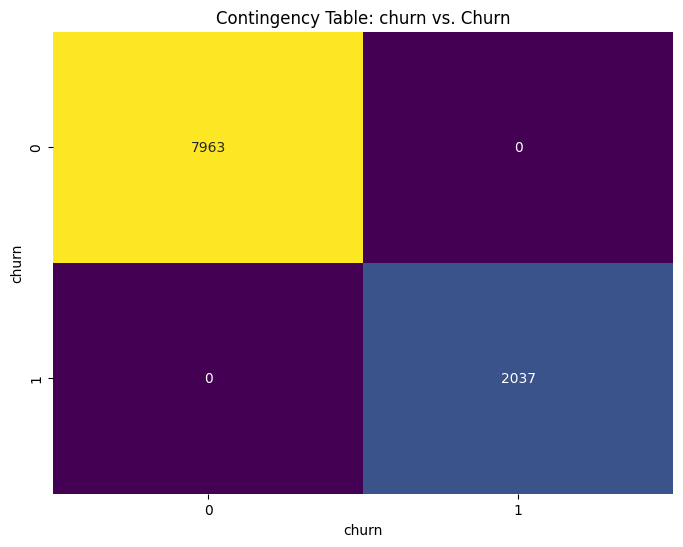

In [16]:
for column in categorical_variables:
    contingency_table = pd.crosstab(df[column], df['churn'])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    print(f"\nChi-square test for {column} vs. Churn:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")

    # Visualization of the contingency table
    plt.figure(figsize=(8, 6))
    sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d', cbar=False)
    plt.title(f'Contingency Table: {column} vs. Churn')
    plt.show()

**##Generates a line plot and performs regression analysis for two numeric variables.**

**# Bivariate Analysis - Box Plots and Violin Plots (Numeric vs. Categorical Variables)**

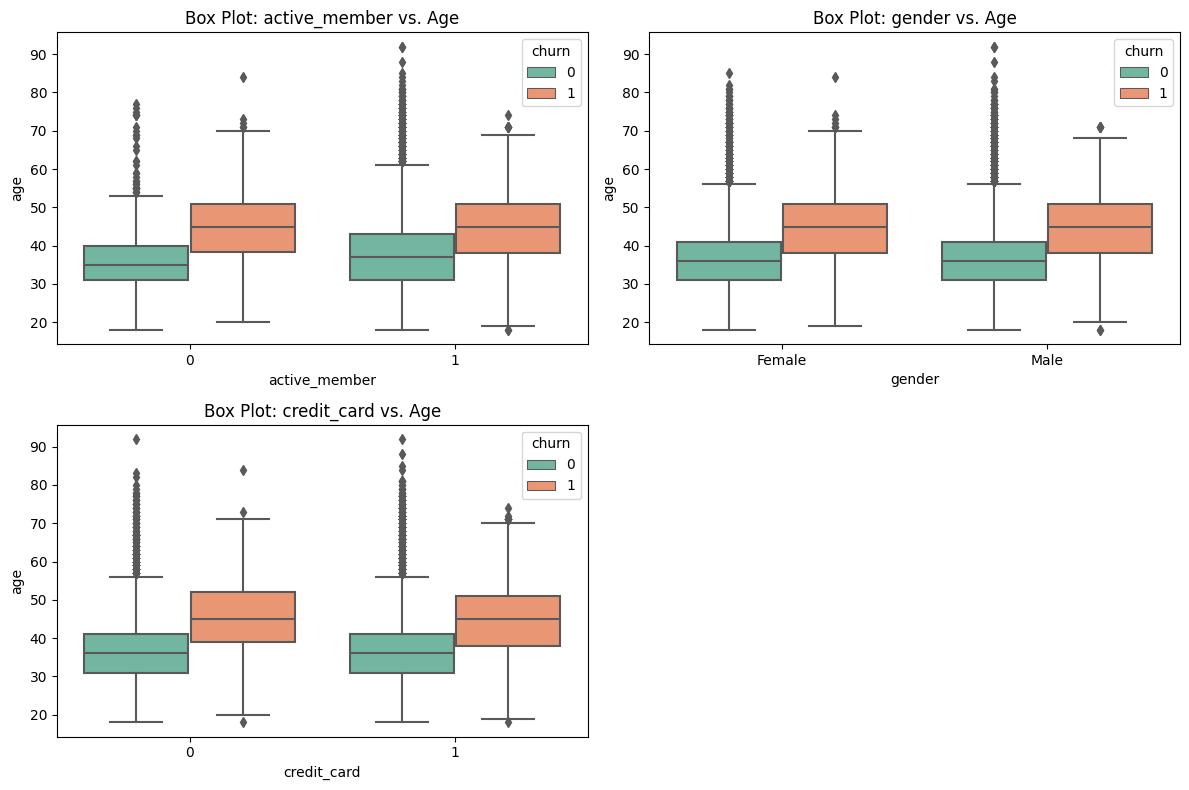

In [17]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(categorical_variables[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[column], y=df['age'], hue=df['churn'], palette='Set2')
    plt.title(f'Box Plot: {column} vs. Age')

plt.tight_layout()
plt.show()